**The questions about this dataset:**
1. How can we know if the improvement of Tutorial in-game version 1.6.0 has impacted the User Experience better than in-game
version 1.5.2?
2. Can we roll out 100% game version 1.6.0 to all users or not? Why? (Analyze and evaluate the 2 versions).
3. Based on the data and your experience with the game, do you have any ideas to improve our User Experience? Explain it in detail
(image, text, diagram, logic, game mechanics,...)

In [111]:
# Import all the libraries which will be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

**DATA WRANGLING**


1. *game_end* dataset

In [112]:
# load in game_end dataset and print out the head 
game_end=pd.read_csv('D:/indiez_assign/data/processed/game_end.csv')
game_end.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,48,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0.0,out_of_lives,31,1.6.0
1,49,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,18,1.6.0
2,50,2023-10-28,game_end,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,10,1.6.0
3,51,2023-10-28,game_end,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,9,1.6.0
4,52,2023-10-28,game_end,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,8,1.6.0


In [113]:
# check the rows and columns of game_end dataset
game_end.shape  

(243697, 12)

In [114]:
# check datatypes to see if there are some wrongly categorized types in game_end dataset
game_end.dtypes

event_id           int64
date_time         object
event_name        object
level              int64
user              object
day_diff         float64
day0              object
mode_game         object
win              float64
reason_to_die     object
quantity           int64
version           object
dtype: object

In [115]:
# check each columns number of unique values 
game_end.nunique()

event_id         243697
date_time            14
event_name            1
level               518
user              13042
day_diff              8
day0                  7
mode_game             1
win                   2
reason_to_die         2
quantity           1034
version               2
dtype: int64

In [116]:
# statistic values for game_end dataset
game_end.describe()

,event_id,level,day_diff,win,quantity
count,2.436970e+05,243697.000000,243697.000000,243697.000000,243697.000000
mean,2.451077e+06,25.443284,1.110252,0.518201,47.377797
std,1.382828e+06,44.866007,1.760307,0.499670,89.904959
min,4.800000e+01,1.000000,0.000000,0.000000,2.000000
25%,1.243079e+06,5.000000,0.000000,0.000000,14.000000
50%,2.480019e+06,12.000000,0.000000,1.000000,25.000000
75%,3.581332e+06,23.000000,2.000000,1.000000,49.000000
max,7.501776e+06,518.000000,7.000000,1.000000,15642.000000


In [117]:
game_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243697 entries, 0 to 243696
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_id       243697 non-null  int64  
 1   date_time      243697 non-null  object 
 2   event_name     243697 non-null  object 
 3   level          243697 non-null  int64  
 4   user           243697 non-null  object 
 5   day_diff       243697 non-null  float64
 6   day0           243697 non-null  object 
 7   mode_game      243697 non-null  object 
 8   win            243697 non-null  float64
 9   reason_to_die  117413 non-null  object 
 10  quantity       243697 non-null  int64  
 11  version        243697 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 22.3+ MB


In [118]:
game_end.isnull().sum()

event_id              0
date_time             0
event_name            0
level                 0
user                  0
day_diff              0
day0                  0
mode_game             0
win                   0
reason_to_die    126284
quantity              0
version               0
dtype: int64

In [119]:
# For all missing data with object as datatype , I fill in with string "unknown"
game_end['reason_to_die'].fillna('unknown',inplace=True) 

In [120]:
# confirm game_end dataset after fillna
game_end.isnull().sum()

event_id         0
date_time        0
event_name       0
level            0
user             0
day_diff         0
day0             0
mode_game        0
win              0
reason_to_die    0
quantity         0
version          0
dtype: int64

In [121]:
# check if there are some duplicates in game_end dataset
game_end.duplicated().sum()

0

In [122]:
# drop the duplicates
game_end.drop_duplicates(inplace=True) 
# confirm again 
game_end.duplicated().sum() 

0

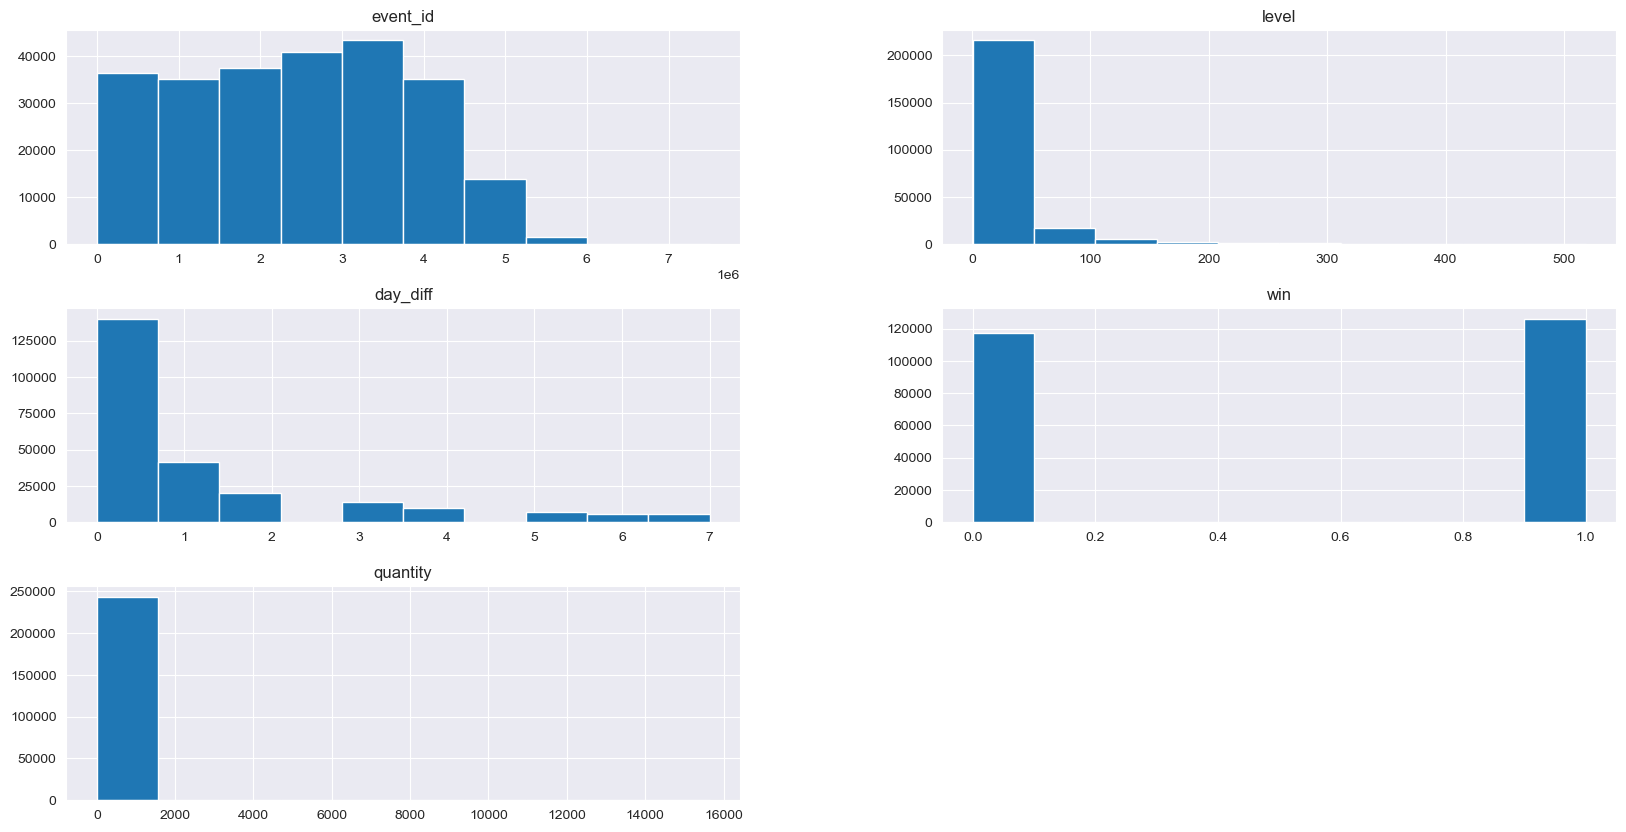

In [123]:
# visulize each variables 
game_end.hist(figsize=(20,10));

2. *game_start* dataset

In [124]:
# load in game_start dataset and print out the head 
game_start=pd.read_csv('D:/indiez_assign/data/processed/game_start.csv')
game_start.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,quantity,version
0,40,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
1,41,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
2,42,2023-10-28,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
3,43,2023-10-28,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0
4,44,2023-10-28,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0,1.6.0


In [125]:
# check the rows and columns of game_start dataset
game_start.shape  

(249799, 10)

In [126]:
# check datatypes to see if there are some wrongly categorized types in game_start dataset
game_start.dtypes

event_id        int64
date_time      object
event_name     object
level           int64
user           object
day_diff      float64
day0           object
mode_game      object
quantity        int64
version        object
dtype: object

In [127]:
# check each columns number of unique values 
game_start.nunique()

event_id      249799
date_time         14
event_name         1
level            519
user           13255
day_diff           8
day0               7
mode_game          1
quantity           1
version            2
dtype: int64

In [128]:
# statistic values for game_start dataset
game_start.describe()

,event_id,level,day_diff,quantity
count,2.497990e+05,249799.000000,249799.000000,249799.0
mean,2.450962e+06,25.370042,1.108519,0.0
std,1.382872e+06,44.664307,1.759160,0.0
min,4.000000e+01,1.000000,0.000000,0.0
25%,1.244066e+06,5.000000,0.000000,0.0
50%,2.479657e+06,12.000000,0.000000,0.0
75%,3.581286e+06,23.000000,2.000000,0.0
max,7.501770e+06,519.000000,7.000000,0.0


In [129]:
game_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249799 entries, 0 to 249798
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   event_id    249799 non-null  int64  
 1   date_time   249799 non-null  object 
 2   event_name  249799 non-null  object 
 3   level       249799 non-null  int64  
 4   user        249799 non-null  object 
 5   day_diff    249799 non-null  float64
 6   day0        249799 non-null  object 
 7   mode_game   249799 non-null  object 
 8   quantity    249799 non-null  int64  
 9   version     249799 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 19.1+ MB


In [130]:
game_start.isnull().sum()

event_id      0
date_time     0
event_name    0
level         0
user          0
day_diff      0
day0          0
mode_game     0
quantity      0
version       0
dtype: int64

In [131]:
# check if there are some duplicates in game_start dataset
game_start.duplicated().sum()

0

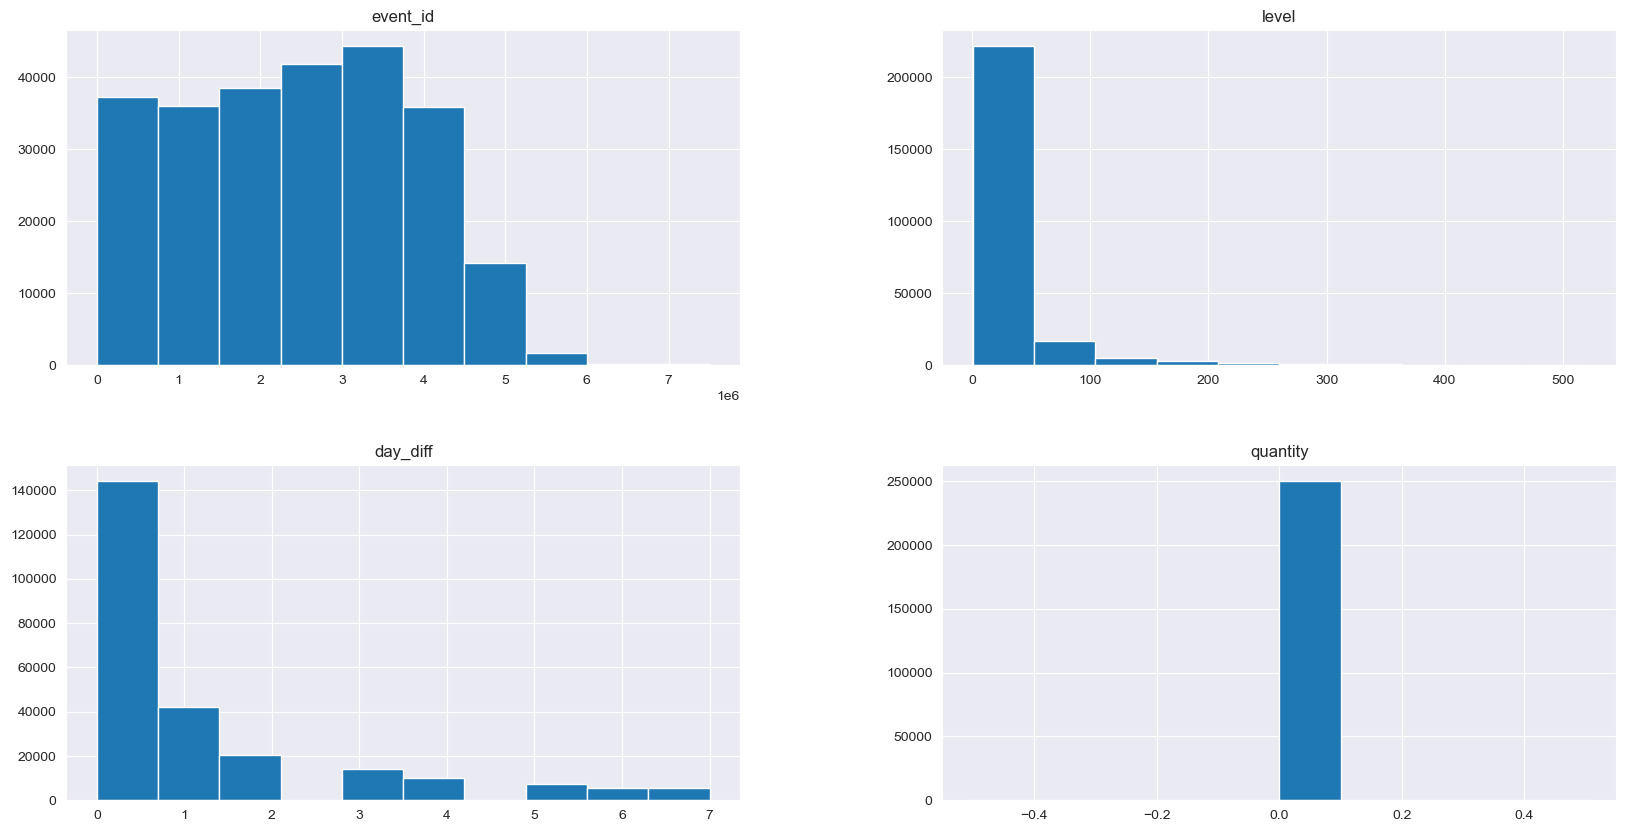

In [133]:
# visualize each variables 
game_start.hist(figsize=(20,10));

3. *tutorial* dataset

In [134]:
# load in tutorial dataset and print out the head 
tutorial=pd.read_csv('D:/indiez_assign/data/processed/tutorial.csv')
tutorial.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,quantity,version
0,147,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,-1,1.6.0
1,148,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,1,1.6.0
2,149,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,2,1.6.0
3,150,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,3,1.6.0
4,151,2023-10-28,tutorial,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,tutorial,4,1.6.0


In [135]:
# check the rows and columns of tutorial dataset
tutorial.shape  

(108587, 10)

In [136]:
# check datatypes to see if there are some wrongly categorized types in tutorial dataset
tutorial.dtypes

event_id        int64
date_time      object
event_name     object
level           int64
user           object
day_diff      float64
day0           object
mode_game      object
quantity        int64
version        object
dtype: object

In [137]:
# check each columns number of unique values 
tutorial.nunique()

event_id      108587
date_time         13
event_name         1
level             41
user           13481
day_diff           8
day0               7
mode_game          1
quantity          11
version            2
dtype: int64

In [138]:
# statistic values for tutorial dataset
tutorial.describe()

,event_id,level,day_diff,quantity
count,1.085870e+05,108587.000000,108587.000000,108587.000000
mean,2.576075e+06,1.216205,0.027020,2.464816
std,1.507411e+06,2.262813,0.301622,2.999546
min,1.470000e+02,1.000000,0.000000,-2.000000
25%,1.403528e+06,1.000000,0.000000,-1.000000
50%,2.567019e+06,1.000000,0.000000,2.000000
75%,3.612922e+06,1.000000,0.000000,4.000000
max,7.938070e+06,92.000000,7.000000,8.000000


In [139]:
tutorial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108587 entries, 0 to 108586
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   event_id    108587 non-null  int64  
 1   date_time   108587 non-null  object 
 2   event_name  108587 non-null  object 
 3   level       108587 non-null  int64  
 4   user        108587 non-null  object 
 5   day_diff    108587 non-null  float64
 6   day0        108587 non-null  object 
 7   mode_game   108587 non-null  object 
 8   quantity    108587 non-null  int64  
 9   version     108587 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 8.3+ MB


In [140]:
tutorial.isnull().sum()

event_id      0
date_time     0
event_name    0
level         0
user          0
day_diff      0
day0          0
mode_game     0
quantity      0
version       0
dtype: int64

In [141]:
# check if there are some duplicates in tutorial dataset
tutorial.duplicated().sum()

0

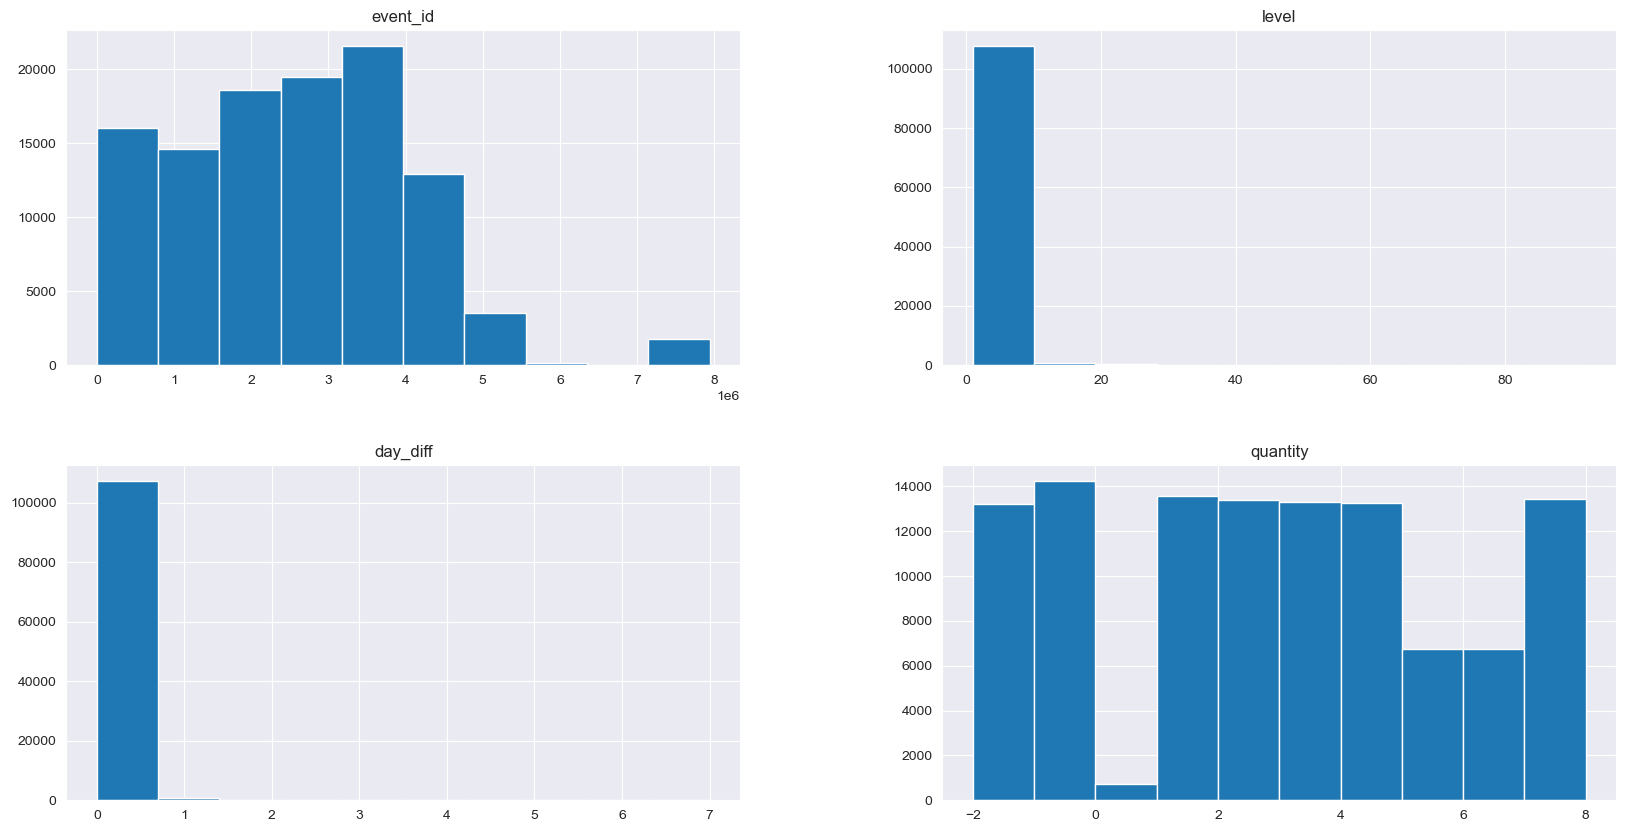

In [143]:
# visualize each variables 
tutorial.hist(figsize=(20,10));

4. *user_engagement* dataset

In [144]:
# load in user_engagement dataset and print out the head 
user_engagement=pd.read_csv('D:/indiez_assign/data/processed/user_engagement.csv')
user_engagement.head()

,event_id,date_time,event_name,level,user,day_diff,day0,mode_game,quantity,version
0,162,2023-10-28,user_engagement,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ss,0,1.6.0
1,163,2023-10-28,user_engagement,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0
2,164,2023-10-28,user_engagement,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0
3,165,2023-10-28,user_engagement,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0
4,166,2023-10-28,user_engagement,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,ue,0,1.6.0


In [145]:
# check the rows and columns of user_engagement dataset
user_engagement.shape  

(196249, 10)

In [146]:
# check datatypes to see if there are some wrongly categorized types in user_engagement dataset
user_engagement.dtypes

event_id        int64
date_time      object
event_name     object
level           int64
user           object
day_diff      float64
day0           object
mode_game      object
quantity        int64
version        object
dtype: object

In [147]:
# check each columns number of unique values 
user_engagement.nunique()

event_id      196249
date_time         14
event_name         1
level            500
user           13582
day_diff           8
day0               7
mode_game          2
quantity           1
version            2
dtype: int64

In [148]:
# statistic values for user_engagement dataset
user_engagement.describe()

,event_id,level,day_diff,quantity
count,1.962490e+05,196249.000000,196249.000000,196249.0
mean,2.393093e+06,25.962374,1.262661,0.0
std,1.411244e+06,46.149887,1.863484,0.0
min,1.620000e+02,1.000000,0.000000,0.0
25%,1.189827e+06,4.000000,0.000000,0.0
50%,2.395089e+06,11.000000,0.000000,0.0
75%,3.498081e+06,24.000000,2.000000,0.0
max,7.957952e+06,519.000000,7.000000,0.0


In [149]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196249 entries, 0 to 196248
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   event_id    196249 non-null  int64  
 1   date_time   196249 non-null  object 
 2   event_name  196249 non-null  object 
 3   level       196249 non-null  int64  
 4   user        196249 non-null  object 
 5   day_diff    196249 non-null  float64
 6   day0        196249 non-null  object 
 7   mode_game   196249 non-null  object 
 8   quantity    196249 non-null  int64  
 9   version     196249 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 15.0+ MB


In [150]:
user_engagement.isnull().sum()

event_id      0
date_time     0
event_name    0
level         0
user          0
day_diff      0
day0          0
mode_game     0
quantity      0
version       0
dtype: int64

In [151]:
# check if there are some duplicates in user_engagement dataset
user_engagement.duplicated().sum()

0

In [152]:
# drop the duplicates
user_engagement.drop_duplicates(inplace=True) 
# confirm again 
user_engagement.duplicated().sum()

0

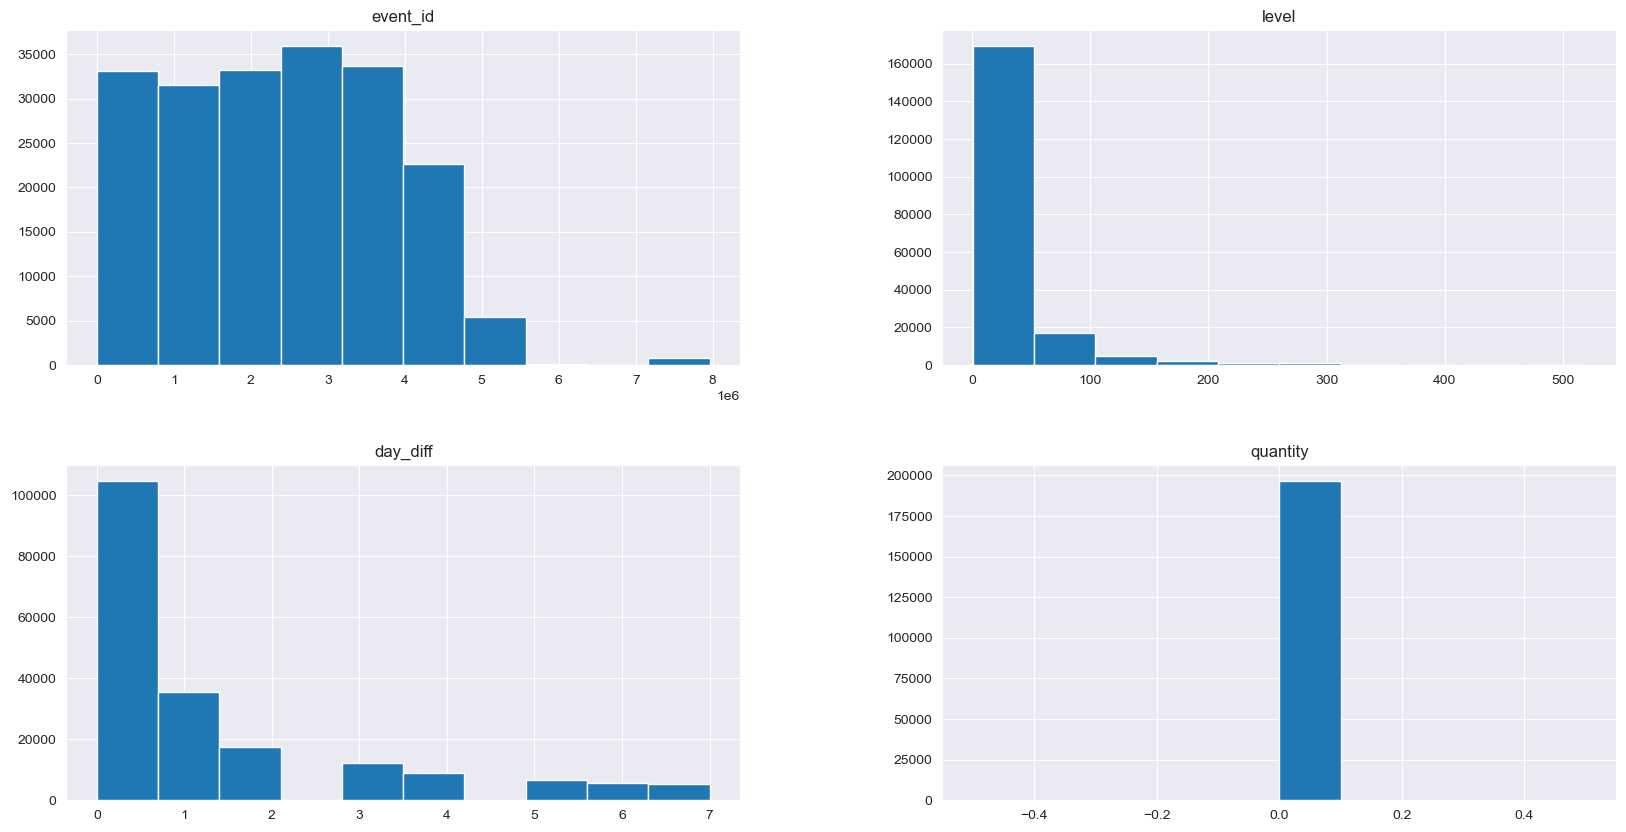

In [153]:
# visualize each variables 
user_engagement.hist(figsize=(20,10));

**EXPLORATION WITH VISUALS AND CONCLUSIONS**


*1. How can we know if the improvement of Tutorial in-game version 1.6.0 has impacted the User Experience better than in-game
version 1.5.2?*
